In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import scipy.stats as stats

%matplotlib notebook

HTML pages have to be renamed so that the data are correctly uploaded to this notebook.

In [2]:
liverpool=pd.read_html("Liverpool.html")[2]
liverpool=liverpool[62:len(liverpool)-1].reset_index(drop=True)
liverpool=liverpool[liverpool.columns[0:10]]
liverpool[liverpool.columns[3:9]]=liverpool[liverpool.columns[3:9]].astype(int)

liverpool.head()

Season      League                                 
    Season    Division Pld   W   D   L  GF  GA Pts  Pos
0  1962–63  Division 1  42  17  10  15  71  59  44  8th
1  1963–64  Division 1  42  26   5  11  92  45  57  1st
2  1964–65  Division 1  42  17  10  15  67  73  44  7th
3  1965–66  Division 1  42  26   9   7  79  34  61  1st
4  1966–67  Division 1  42  19  13  10  64  47  51  5th

In [3]:
everton=pd.read_html("Everton.html")[1]
everton=everton[7:len(everton)].reset_index(drop=True)
everton=everton[everton.columns[0:10]]

In [4]:
#function used to remove + and - signs in everton table so that an int data conversion is reachable

def sinm(x):
    
    return(re.sub("[^\w]", "", x))

In [5]:
everton[everton.columns[7]]=everton[everton.columns[7]]=everton[everton.columns[7]].apply(sinm)
everton[everton.columns[3:9]]=everton[everton.columns[3:9]].astype(int)

everton.head()

Season League statistics                                 
    Season            League Tier Pld   W   D   L  GD Pts Pos
0  1962–63    First Division    1  42  25  11   6  42  61   1
1  1963–64    First Division    1  42  21  10  11  20  52   3
2  1964–65    First Division    1  42  17  15  10   9  49   4
3  1965–66    First Division    1  42  15  11  16   6  41  11
4  1966–67    First Division    1  42  19  10  13  19  48   6

In [6]:
#plot data

x = [x for x in range(0,len(liverpool))]

#Liverpool win ratio
y = [y for y in liverpool[liverpool.columns[3]]/(liverpool[liverpool.columns[3]]
                                                 +liverpool[liverpool.columns[4]]+liverpool[liverpool.columns[5]])]

#Everton lose ratio
z = [z for z in everton[everton.columns[6]]/(everton[everton.columns[4]]+everton[everton.columns[5]]
                                            +everton[everton.columns[6]])]

In [7]:
import seaborn as sns

In [8]:
#calculation of pearson coefficient and p value (this version of sns doesn't show these values after plotting)

p = stats.pearsonr(y,z)
p 

(-0.12890317676646673, 0.3305501101395909)

C:\Users\angry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


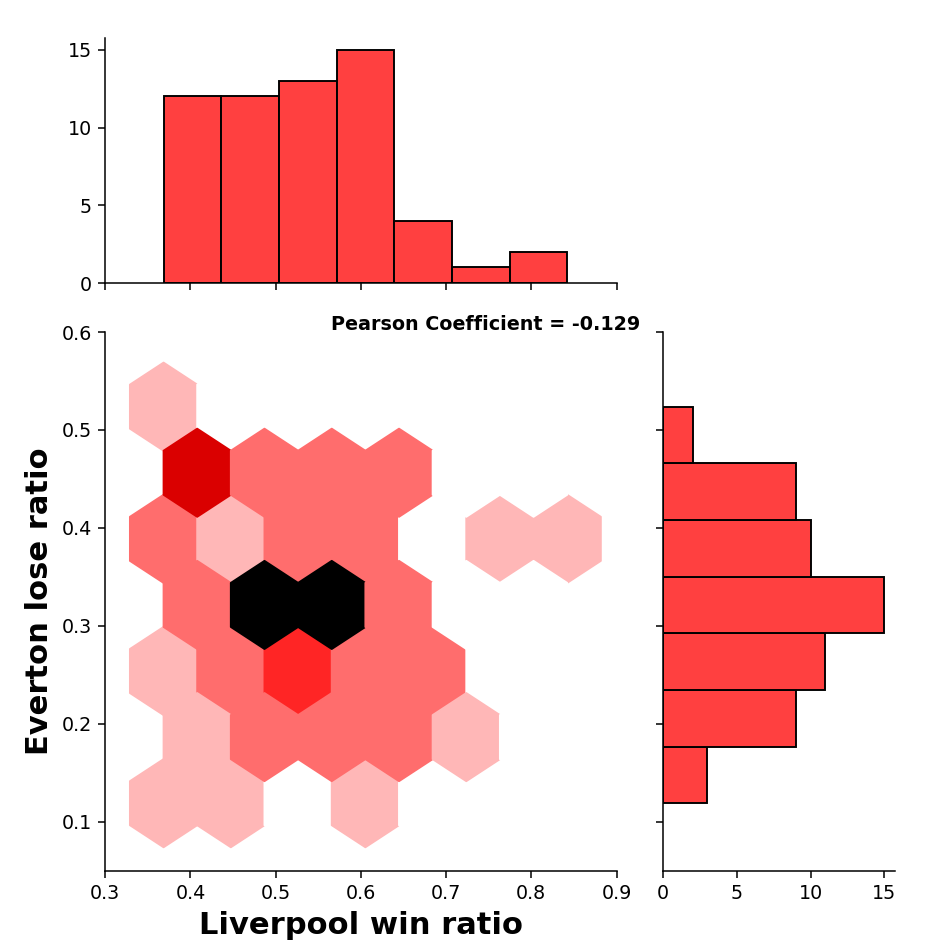

In [9]:
#honeycomb-like plot and correlation coefficients (previously found)

panal = sns.jointplot(y, z, kind='hex', height=5, ratio=2, marginal_ticks=True, color="red",
                      xlim=(0.3,0.9), ylim=(0.05,0.6))
panal.set_axis_labels('Liverpool win ratio', 'Everton lose ratio', fontsize=16, fontweight='bold')
panal.fig.text(0.35, 0.65,'Pearson Coefficient = -0.129', fontsize=10, fontweight='bold')
panal.savefig("honeycomb.pdf")